### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.pipeline import Pipeline
plt.rcParams['figure.figsize'] = (6, 5)

### Importing Dataset

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

### Exploratory Data Analysis (EDA)

#### Train Data

In [3]:
train_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39211.0,42.120247,12.709352,18.0,33.0,40.0,50.0,95.0
balance,39211.0,5441.781719,16365.292065,-8019.0,98.0,549.0,2030.0,102127.0
duration,39211.0,439.062789,769.096291,0.0,109.0,197.0,380.0,4918.0
campaign,39211.0,5.108770,9.890153,1.0,1.0,2.0,4.0,63.0
pdays,39211.0,72.256051,160.942593,-1.0,-1.0,-1.0,-1.0,871.0
previous,39211.0,11.826171,44.140259,0.0,0.0,0.0,0.0,275.0


In [6]:
rows, columns = train_data.shape
print(f'Train Data has {rows} rows & {columns} columns')

Train Data has 39211 rows & 16 columns


In [7]:
for column in list(train_data.columns):
    n_unique = len(train_data[column].unique())
    print(f'\"{column}\" column has {n_unique} unique values')

"last contact date" column has 1013 unique values
"age" column has 78 unique values
"job" column has 12 unique values
"marital" column has 3 unique values
"education" column has 4 unique values
"default" column has 2 unique values
"balance" column has 9535 unique values
"housing" column has 2 unique values
"loan" column has 2 unique values
"contact" column has 3 unique values
"duration" column has 3146 unique values
"campaign" column has 63 unique values
"pdays" column has 865 unique values
"previous" column has 276 unique values
"poutcome" column has 4 unique values
"target" column has 2 unique values


#### Test Data

In [8]:
test_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [10]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,42.2612,12.650137,18.0,33.0,40.0,50.0,94.0
balance,10000.0,5328.7892,15944.545194,-3372.0,92.0,541.0,2051.0,101418.0
duration,10000.0,437.1177,761.232963,0.0,108.0,196.0,380.0,4909.0
campaign,10000.0,5.1597,9.975928,1.0,1.0,2.0,4.0,63.0
pdays,10000.0,71.7057,160.374253,-1.0,-1.0,-1.0,-1.0,871.0
previous,10000.0,12.0281,44.467155,0.0,0.0,0.0,0.0,275.0


In [11]:
rows, columns = test_data.shape
print(f'Test Data has {rows} rows & {columns} columns')

Test Data has 10000 rows & 15 columns


In [12]:
for column in list(test_data.columns):
    n_unique = len(test_data[column].unique())
    print(f'\"{column}\" column has {n_unique} unique values')

"last contact date" column has 908 unique values
"age" column has 77 unique values
"job" column has 12 unique values
"marital" column has 3 unique values
"education" column has 4 unique values
"default" column has 2 unique values
"balance" column has 4384 unique values
"housing" column has 2 unique values
"loan" column has 2 unique values
"contact" column has 3 unique values
"duration" column has 1664 unique values
"campaign" column has 63 unique values
"pdays" column has 679 unique values
"previous" column has 261 unique values
"poutcome" column has 4 unique values


### Checking for Missing Values

In [13]:
train_data.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [14]:
for column in train_data.columns:
    missing_percentage = round((train_data[column].isna().sum()/(train_data.shape[0]))*100, 2)
    print(f"{column} - {missing_percentage}% missing values")

last contact date - 0.0% missing values
age - 0.0% missing values
job - 0.58% missing values
marital - 0.0% missing values
education - 3.74% missing values
default - 0.0% missing values
balance - 0.0% missing values
housing - 0.0% missing values
loan - 0.0% missing values
contact - 26.36% missing values
duration - 0.0% missing values
campaign - 0.0% missing values
pdays - 0.0% missing values
previous - 0.0% missing values
poutcome - 75.11% missing values
target - 0.0% missing values


In [15]:
test_data.isna().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

In [16]:
for column in test_data.columns:
    missing_percentage = round((test_data[column].isna().sum()/(test_data.shape[0]))*100, 2)
    print(f"{column} - {missing_percentage}% missing values")

last contact date - 0.0% missing values
age - 0.0% missing values
job - 0.59% missing values
marital - 0.0% missing values
education - 3.9% missing values
default - 0.0% missing values
balance - 0.0% missing values
housing - 0.0% missing values
loan - 0.0% missing values
contact - 26.84% missing values
duration - 0.0% missing values
campaign - 0.0% missing values
pdays - 0.0% missing values
previous - 0.0% missing values
poutcome - 75.08% missing values


Missing values in both `train_data` & `test_data` are `job`, `education`, `contact`, `poutcome`. These all are categorical features. So we must perform imputation to handle that missing values.

In [17]:
columns = ['job', 'education']
imputer = SimpleImputer(strategy='most_frequent')
train_data[columns] = imputer.fit_transform(train_data[columns])
test_data[columns] = imputer.transform(test_data[columns])

In [18]:
columns = ['contact', 'poutcome']
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
train_data[columns] = imputer.fit_transform(train_data[columns])
test_data[columns] = imputer.transform(test_data[columns])

In [19]:
train_data.isna().sum()

last contact date    0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
target               0
dtype: int64

In [20]:
test_data.isna().sum()

last contact date    0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
dtype: int64

### Univariate Analysis

#### `age` column aganist Target variable

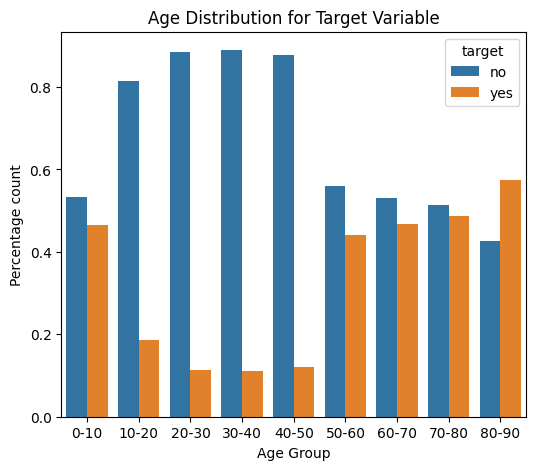

In [21]:
age_bins = range(10, 110, 10)
age_labels = [f"{i}-{i+10}" for i in range(0, 90, 10)]
age_groups = pd.cut(train_data['age'], bins=age_bins, labels=age_labels)

target_age_distribution = pd.crosstab(age_groups, train_data['target'], normalize='index').reset_index()
target_age_distribution = target_age_distribution.melt(id_vars='age', var_name='target', value_name='percentage')

sns.barplot(data=target_age_distribution, x='age', y='percentage', hue='target')

plt.title('Age Distribution for Target Variable')
plt.xlabel('Age Group')
plt.ylabel('Percentage count')
plt.show()

#### `job` column aganist Target variable

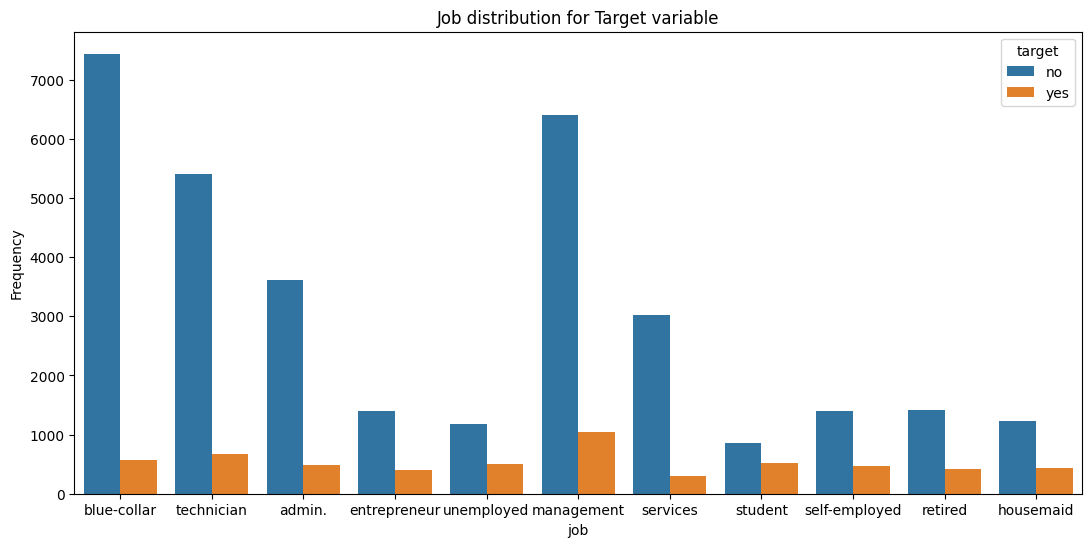

In [22]:
plt.figure(figsize=(13,6))
sns.countplot(x=train_data['job'], hue=train_data['target']);
plt.ylabel('Frequency');
plt.title('Job distribution for Target variable');

#### `martial` column aganist Target variable

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1913562342.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=train_data['marital'], col=train_data['target'], kind='count', data=train_data, palette='Set2');


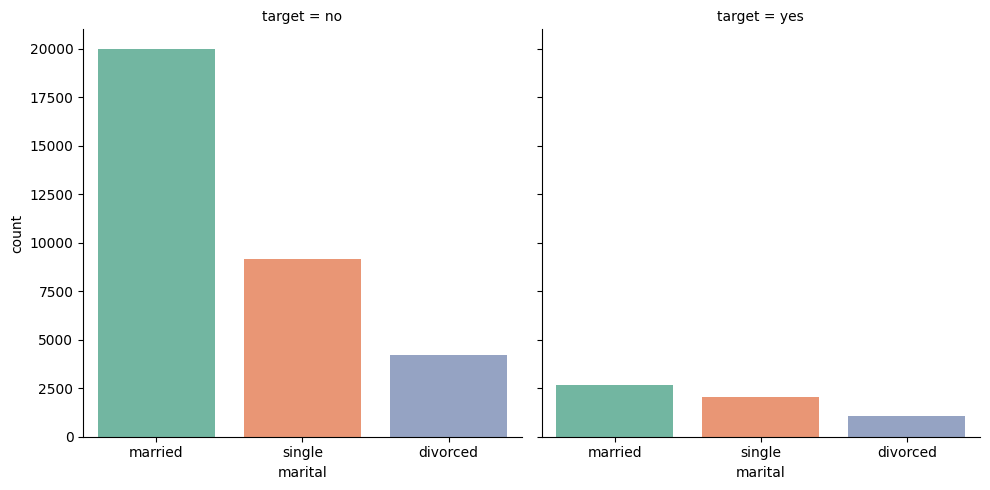

In [23]:
sns.catplot(x=train_data['marital'], col=train_data['target'], kind='count', data=train_data, palette='Set2');
plt.ylabel('Frequency');

#### `education` column aganist Target variable

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/3443494319.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=train_data['education'], col=train_data['target'], kind='count', data=train_data, palette='Set2');


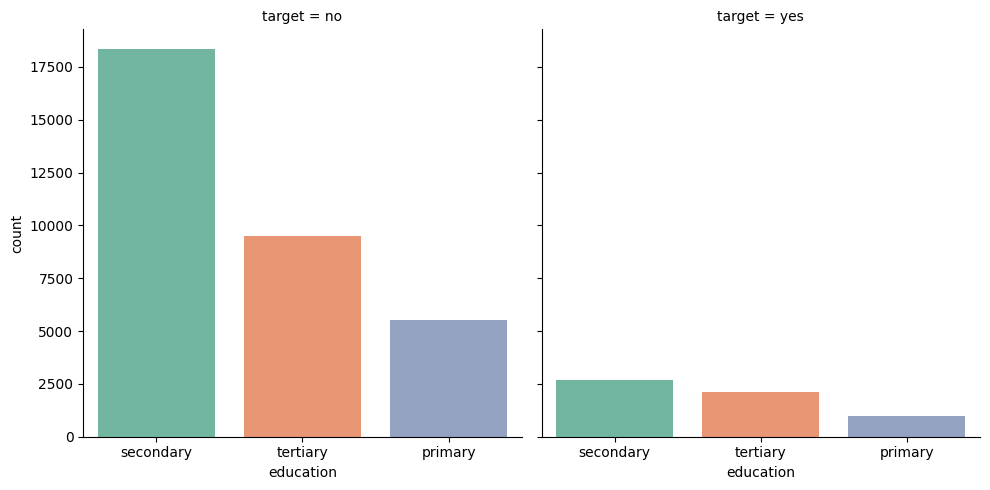

In [24]:
sns.catplot(x=train_data['education'], col=train_data['target'], kind='count', data=train_data, palette='Set2');
plt.ylabel('Frequency');

#### `default` column aganist Target variable

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/2748157106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=train_data['default'], col=train_data['target'], kind='count', palette='Set2')


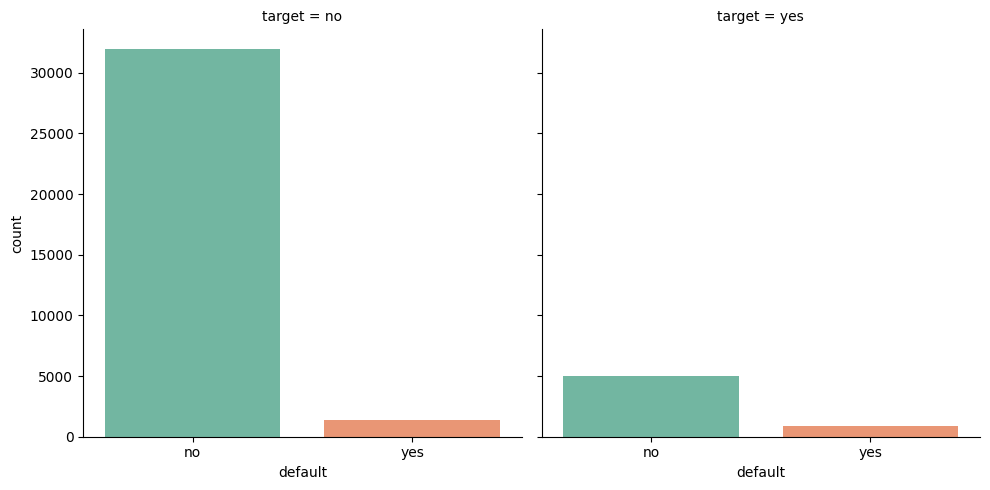

In [25]:
sns.catplot(x=train_data['default'], col=train_data['target'], kind='count', palette='Set2')

#### `balance` column aganist Target variable

In [26]:
y_zero_balance = ((train_data['balance'] == 0) & (train_data['target']=='yes')).value_counts()
n_zero_balance = ((train_data['balance'] == 0) & (train_data['target']=='no')).value_counts()
y_postive_balance = ((train_data['balance'] > 0) & (train_data['target']=='yes')).value_counts()
n_positive_balance = ((train_data['balance'] > 0) & (train_data['target']=='no')).value_counts()
y_negative_balance = ((train_data['balance'] < 0) & (train_data['target']=='yes')).value_counts()
n_negative_balance = ((train_data['balance'] < 0) & (train_data['target']=='no')).value_counts()

print(f'''There are {y_zero_balance[True]} clients who has Zero average yearly balance and said \"yes\",
There are {y_postive_balance[True]} clients who has Positive average yearly balance and said \"yes\",
There are {y_negative_balance[True]} clients who has Negative average yearly balance and said \"yes\"\n\n''')

print(f'''There are {n_zero_balance[True]} clients who has Zero average yearly balance and said \"no\",
There are {n_positive_balance[True]} clients who has Positive average yearly balance and said \"no\",
There are {n_negative_balance[True]} clients who has Negative average yearly balance and said \"no\"''')

There are 235 clients who has Zero average yearly balance and said "yes",
There are 5436 clients who has Positive average yearly balance and said "yes",
There are 156 clients who has Negative average yearly balance and said "yes"


There are 2564 clients who has Zero average yearly balance and said "no",
There are 28005 clients who has Positive average yearly balance and said "no",
There are 2815 clients who has Negative average yearly balance and said "no"


#### `housing` column aganist Target variable

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1610921248.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=train_data['housing'], col=train_data['target'], kind='count', palette='Set2')


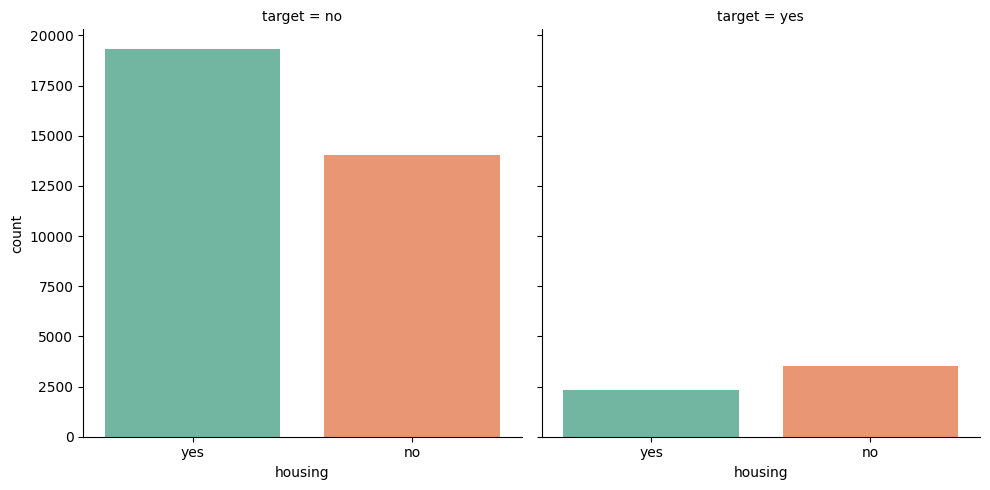

In [27]:
sns.catplot(x=train_data['housing'], col=train_data['target'], kind='count', palette='Set2')

#### `loan` column aganist Target variable

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/4216649998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=train_data['loan'], col=train_data['target'], kind='count', palette='Set2')


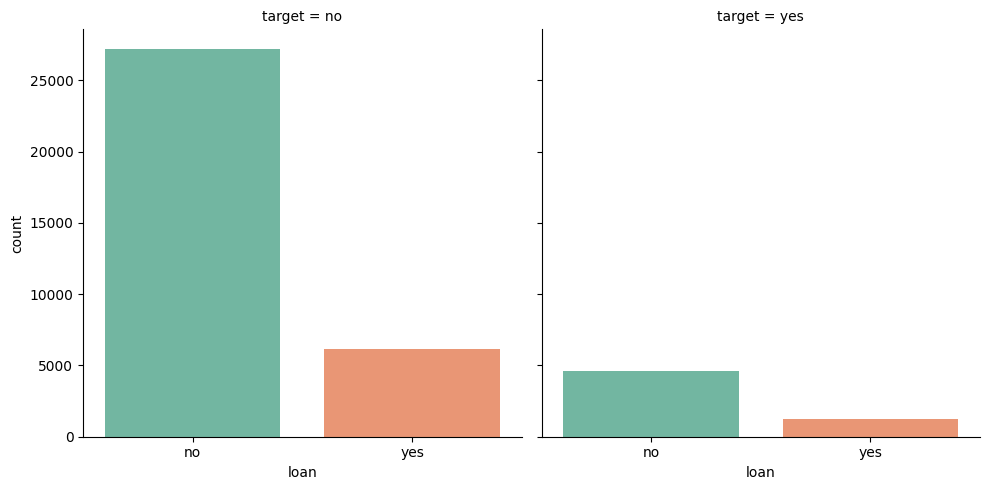

In [28]:
sns.catplot(x=train_data['loan'], col=train_data['target'], kind='count', palette='Set2')

#### `contact` column aganist Target variable

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1130134887.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=train_data['contact'], col=train_data['target'], kind='count', palette='Set2')


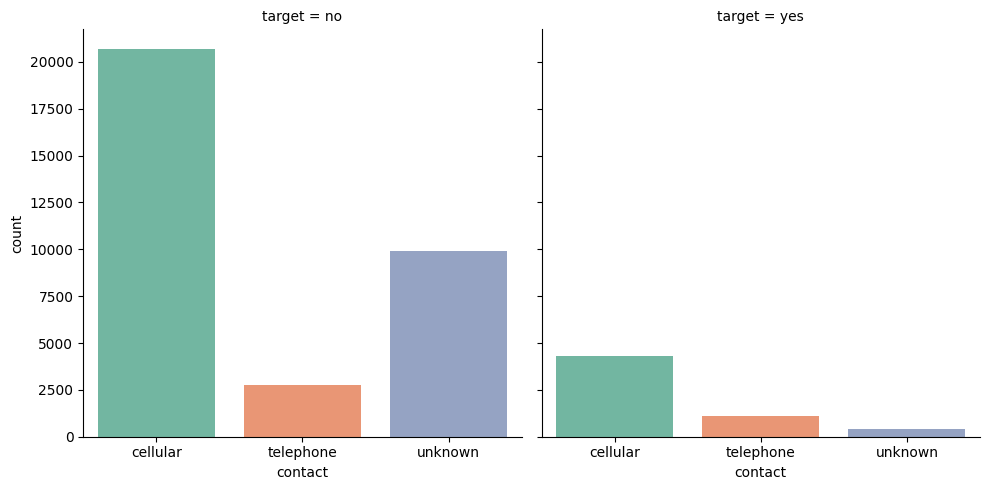

In [29]:
sns.catplot(x=train_data['contact'], col=train_data['target'], kind='count', palette='Set2')

#### `duration` column aganist Target variable

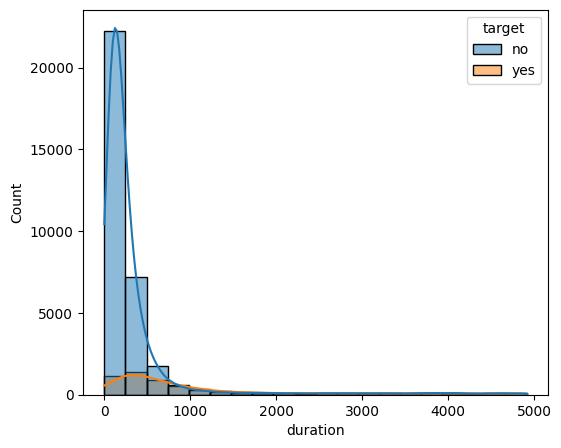

In [30]:
sns.histplot(x='duration', data=train_data, hue='target', kde=True, bins=20);

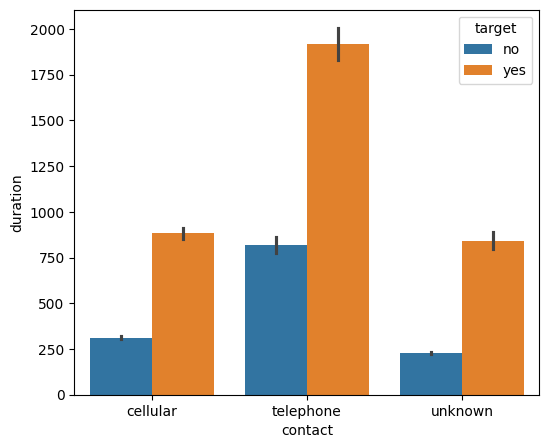

In [31]:
sns.barplot(x='contact', y='duration', hue='target', data=train_data);


#### `campaign` column aganist Target variable

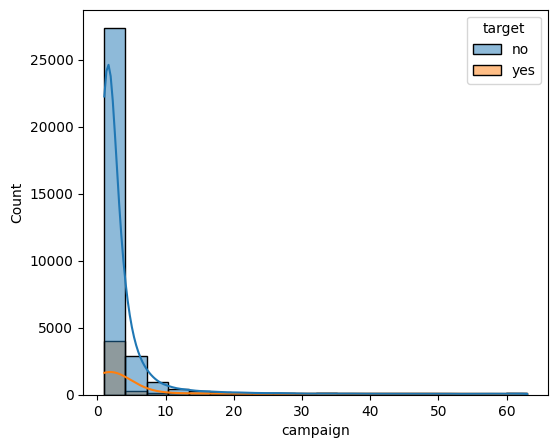

In [32]:
sns.histplot(x='campaign', data=train_data, hue='target', kde=True, bins=20);

#### `pdays` column aganist Target variable

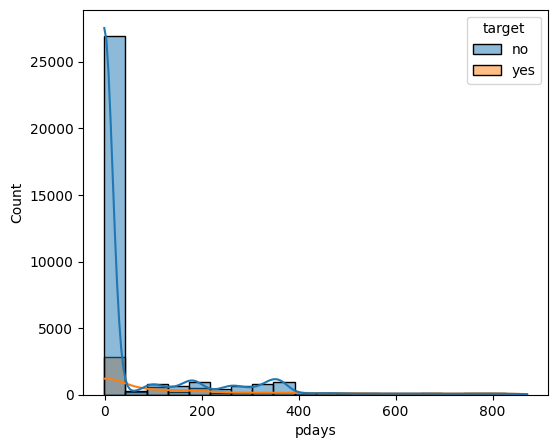

In [33]:
sns.histplot(x='pdays', data=train_data, hue='target', kde=True, bins=20);

#### `previous` column aganist Target variable

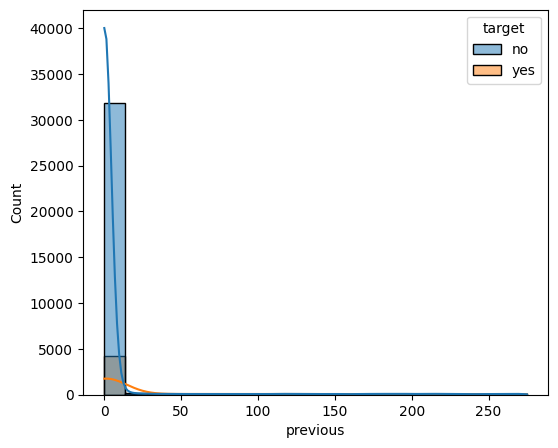

In [34]:
sns.histplot(x='previous', data=train_data, hue='target', kde=True, bins=20);

#### `poutcome` column aganist Target variable

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1717179257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=train_data['poutcome'], col=train_data['target'], kind='count', palette='Set2')


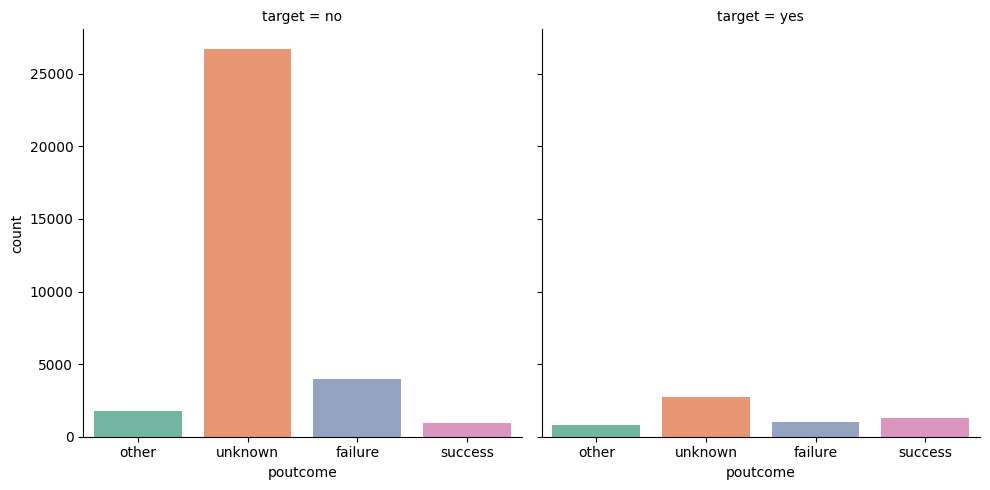

In [35]:
# sns.histplot(x='poutcome', data=train_data, hue='target', kde=True, bins=20);
sns.catplot(x=train_data['poutcome'], col=train_data['target'], kind='count', palette='Set2')

#### Imbalance Analysis

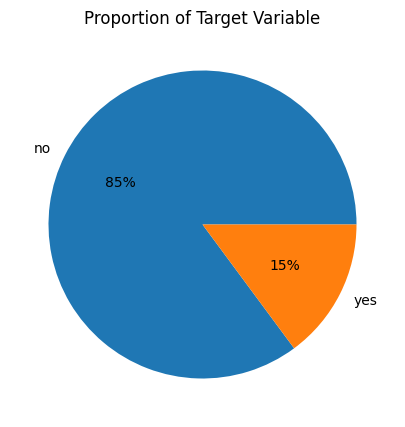

In [36]:
target_counts = train_data['target'].value_counts(normalize=True)
labels = ['no', 'yes']

plt.pie(target_counts, labels=labels, autopct='%.0f%%')
plt.title("Proportion of Target Variable")
plt.show()

In [37]:
X, y = train_data.drop(columns=['target']), train_data['target']
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in strat_split.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### Feature Generation

In [38]:
x_train['last contact date'] = pd.to_datetime(x_train['last contact date'], format='%Y-%m-%d')

x_train['last day'] = x_train['last contact date'].dt.day
x_train['last month'] = x_train['last contact date'].dt.month
x_train['last year'] = x_train['last contact date'].dt.year

x_train.drop(columns=['last contact date'], axis=1, inplace=True)

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/3363383098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['last contact date'] = pd.to_datetime(x_train['last contact date'], format='%Y-%m-%d')
/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/3363383098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['last day'] = x_train['last contact date'].dt.day
/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/3363383098.py:4: SettingWithCopyWarnin

In [39]:
x_test['last contact date'] = pd.to_datetime(x_test['last contact date'], format='%Y-%m-%d')

x_test['last day'] = x_test['last contact date'].dt.day
x_test['last month'] = x_test['last contact date'].dt.month
x_test['last year'] = x_test['last contact date'].dt.year

x_test.drop(columns=['last contact date'], axis=1, inplace=True)

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/401621043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['last contact date'] = pd.to_datetime(x_test['last contact date'], format='%Y-%m-%d')
/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/401621043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['last day'] = x_test['last contact date'].dt.day
/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/401621043.py:4: SettingWithCopyWarning: 
A v

In [40]:
X['last contact date'] = pd.to_datetime(X['last contact date'], format='%Y-%m-%d')

X['last day'] = X['last contact date'].dt.day
X['last month'] = X['last contact date'].dt.month
X['last year'] = X['last contact date'].dt.year
X.drop(columns=['last contact date'], axis=1, inplace=True)


test_data['last contact date'] = pd.to_datetime(test_data['last contact date'], format='%Y-%m-%d')

test_data['last day'] = test_data['last contact date'].dt.day
test_data['last month'] = test_data['last contact date'].dt.month
test_data['last year'] = test_data['last contact date'].dt.year
test_data.drop(columns=['last contact date'], axis=1, inplace=True)

In [41]:
x_train['positive balance'] = np.where(x_train['balance'] > 0, 1, 0)
x_test['positive balance'] = np.where(x_test['balance'] > 0, 1, 0)

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1412002488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['positive balance'] = np.where(x_train['balance'] > 0, 1, 0)
/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1412002488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['positive balance'] = np.where(x_test['balance'] > 0, 1, 0)


In [42]:
X['positive balance'] = np.where(X['balance'] > 0, 1, 0)
test_data['positive balance'] = np.where(test_data['balance'] > 0, 1, 0)

### Data Preprocessing

Applying Ordinal Encoding on `education` column

In [43]:
ordinal_en = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']]).set_output(transform='pandas')
x_train[['education']] = ordinal_en.fit_transform(x_train[['education']]).values
x_test[['education']] = ordinal_en.transform(x_test[['education']]).values

/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1626213712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['education']] = ordinal_en.fit_transform(x_train[['education']]).values
/var/folders/9r/kchn84wj7x59q06p9d34mtfw0000gn/T/ipykernel_50056/1626213712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['education']] = ordinal_en.transform(x_test[['education']]).values


In [44]:
X[['education']] = ordinal_en.fit_transform(X[['education']]).values
test_data[['education']] = ordinal_en.transform(test_data[['education']]).values

Applying One-Hot Encoding on remaining categorical columns

In [45]:
columns = ['job', 'contact', 'poutcome', 'default', 'marital', 'housing', 'loan']
x_train=pd.get_dummies(x_train, drop_first=True, columns=columns)
x_test=pd.get_dummies(x_test, drop_first=True, columns=columns)

In [46]:
cat_columns = ['job', 'contact', 'poutcome', 'default', 'marital', 'housing', 'loan']
X=pd.get_dummies(X, drop_first=True, columns=cat_columns)
test_data=pd.get_dummies(test_data, drop_first=True, columns=cat_columns)

In [47]:
columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'last day', 'last month', 'last year']
std_scaler = StandardScaler().set_output(transform='pandas')
x_train[columns] = std_scaler.fit_transform(x_train[columns])
x_test[columns] = std_scaler.transform(x_test[columns])

In [48]:
num_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'last day', 'last month', 'last year']
X[num_columns] = std_scaler.fit_transform(X[num_columns])
test_data[num_columns] = std_scaler.transform(test_data[num_columns])

#### Checking for Multi-colinearity

<class 'pandas.core.frame.DataFrame'>
Index: 31368 entries, 11002 to 38130
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                31368 non-null  float64
 1   education          31368 non-null  float64
 2   balance            31368 non-null  float64
 3   duration           31368 non-null  float64
 4   campaign           31368 non-null  float64
 5   pdays              31368 non-null  float64
 6   previous           31368 non-null  float64
 7   last day           31368 non-null  float64
 8   last month         31368 non-null  float64
 9   last year          31368 non-null  float64
 10  positive balance   31368 non-null  int64  
 11  job_blue-collar    31368 non-null  bool   
 12  job_entrepreneur   31368 non-null  bool   
 13  job_housemaid      31368 non-null  bool   
 14  job_management     31368 non-null  bool   
 15  job_retired        31368 non-null  bool   
 16  job_self-employed  3136

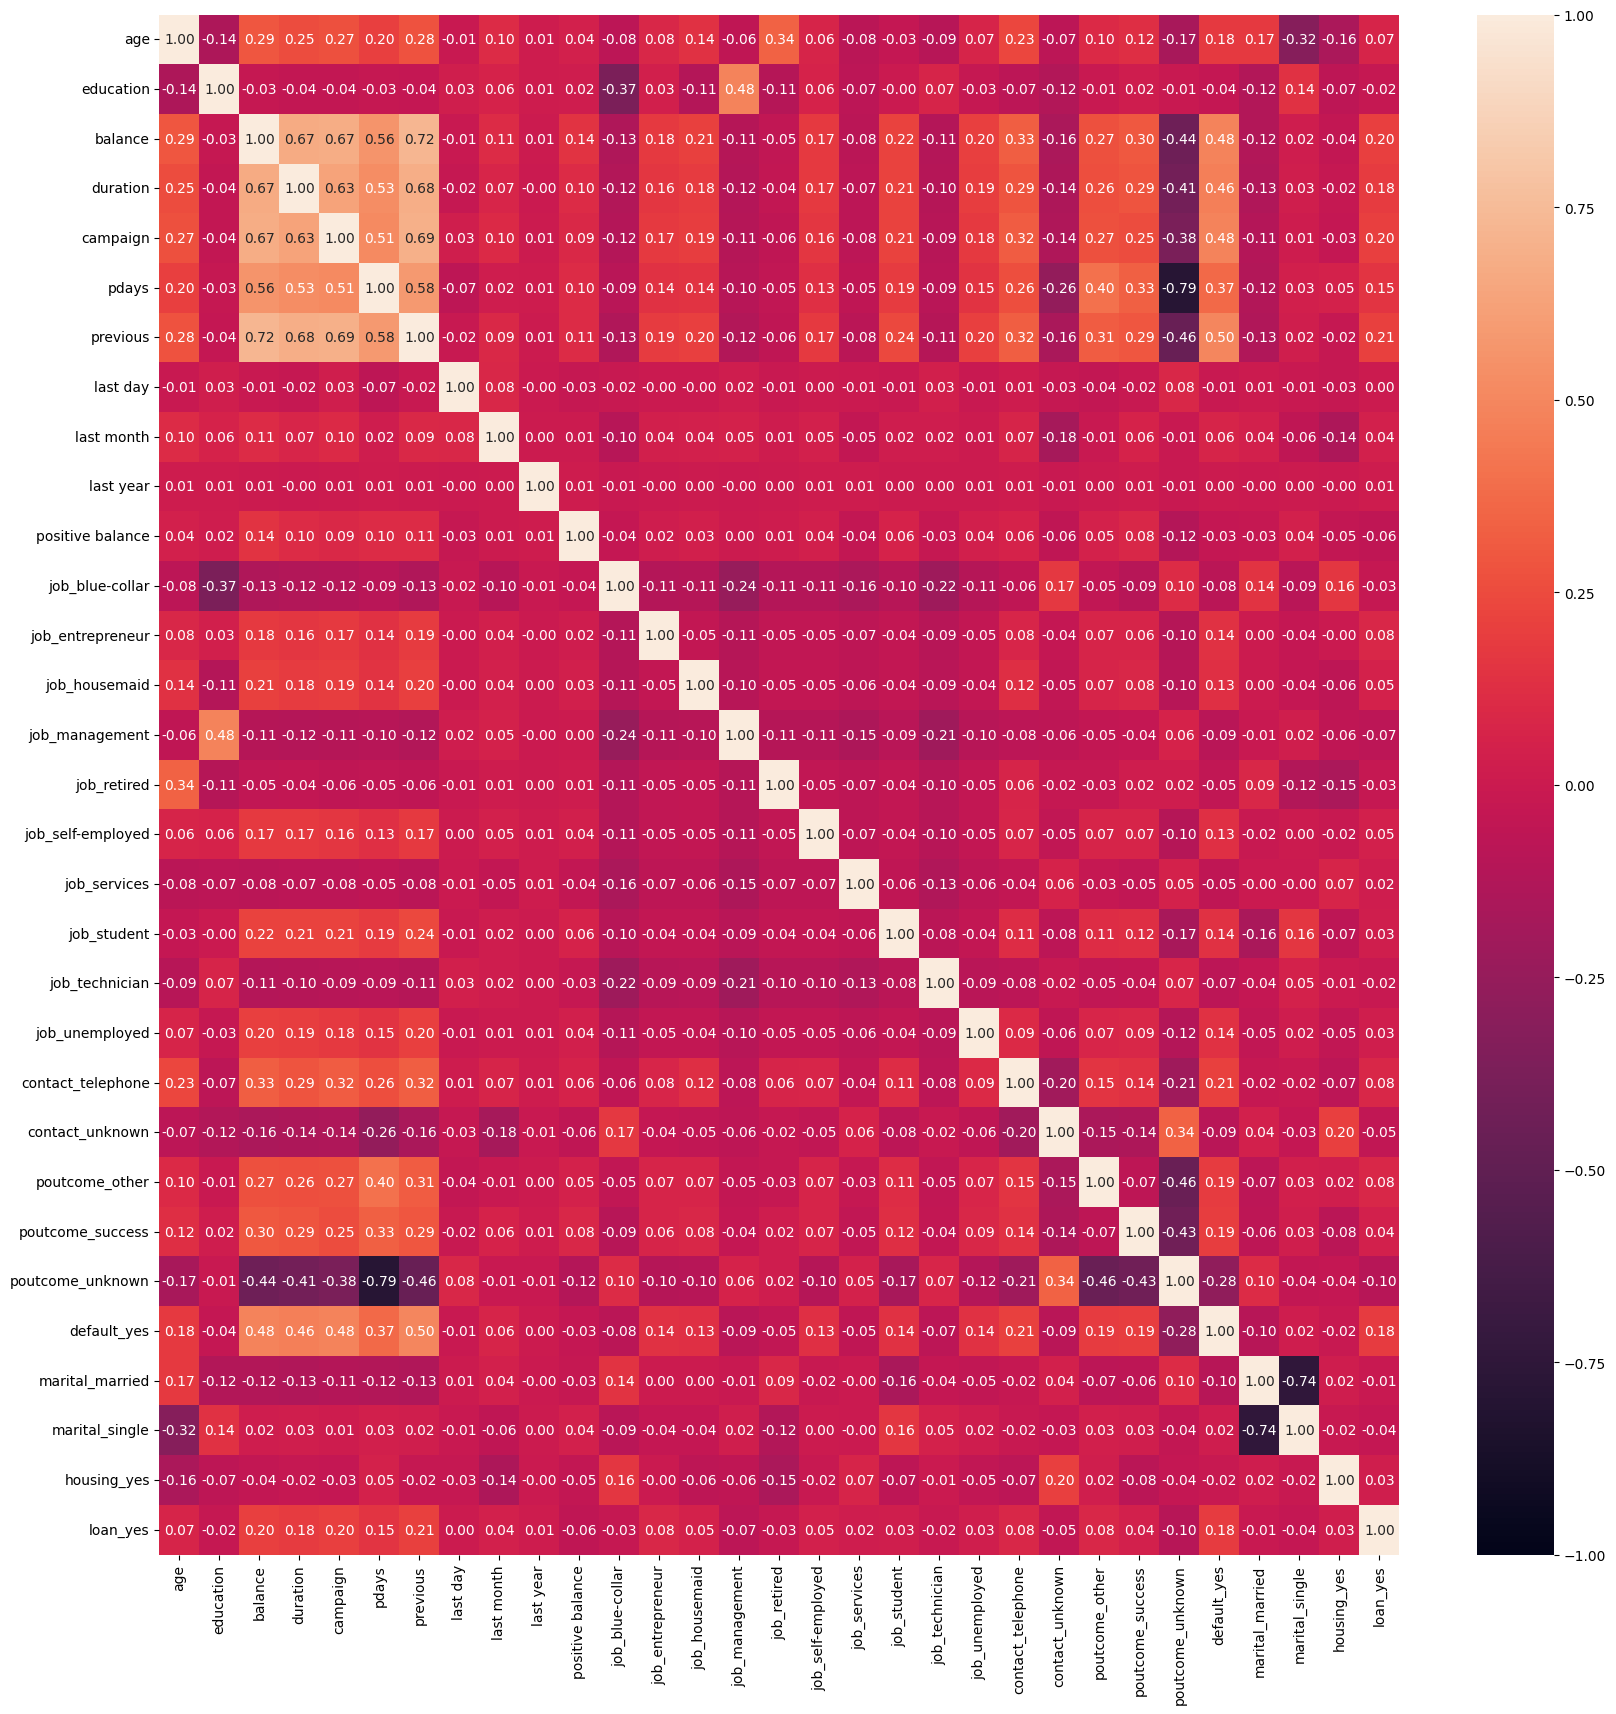

In [49]:
x_train.info()
corr_matrix = x_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

Removing multi-colinearity

In [50]:
def remove_multicollinearity(data, threshold):
    abs_corr_matrix = data.corr().abs()
    columns_to_remove = set()
    
    for i in range(len(abs_corr_matrix.columns)):
        for j in range(i + 1, len(abs_corr_matrix.columns)):
            if abs_corr_matrix.iloc[i, j] > threshold:
                columns_to_remove.add(abs_corr_matrix.columns[i])

    return list(columns_to_remove)

In [51]:
columns = remove_multicollinearity(x_train, 0.78)

x_train = x_train.drop(columns=columns)
x_test = x_test.drop(columns=columns)

print(f"Columns removed due to multicollinearity: {columns}")

Columns removed due to multicollinearity: ['pdays']


In [52]:
X = X.drop(columns=columns)
test_data = test_data.drop(columns=columns)

#### Encoding Labels

In [53]:
label_en = LabelEncoder()
y_train = label_en.fit_transform(y_train)
y_test = label_en.transform(y_test)

In [54]:
y = label_en.fit_transform(y)

#### Feature Selection

In [55]:
kfoldcv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [56]:
rfe = RFECV(estimator=XGBClassifier(random_state=42, n_jobs=-1),
            min_features_to_select=10,
            step=1,
            cv=kfoldcv,
            n_jobs=-1).set_output(transform='pandas')
rfe.fit(x_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=-1,
                              num_parallel_tree=None, random_state=42, ...),
      min_features_to_select=10, n_jobs=-1)

In [57]:
columns = x_train.columns[rfe.support_]
x_train, x_test = x_train[columns], x_test[columns]

In [58]:
X, test_data = X[columns], test_data[columns]

In [59]:
print(f'The Most important features of this dataset are {list(columns)}')

The Most important features of this dataset are ['age', 'education', 'balance', 'duration', 'campaign', 'previous', 'last day', 'last month', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'contact_telephone', 'contact_unknown', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'default_yes', 'marital_married', 'housing_yes', 'loan_yes']


### Model Building

In [70]:
models = [('Logistic Regression', LogisticRegression(random_state=42)),
          ('SGD Classifier', SGDClassifier(random_state=42, n_jobs=-1)),
          ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42,)),
          ('Random Forest Classifier', RandomForestClassifier(random_state=42, n_jobs=-1)),
          ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
          ('XG Boost', XGBClassifier(random_state=42, n_jobs=-1))
          ]

In [71]:
metric = {
    'f1': make_scorer(f1_score, average='macro')
}

In [72]:
fitted_models = {}

for name, model in models:
    print(f"Building {name} model...")
    fitted_model = model.fit(x_train, y_train)
    fitted_models[name] = fitted_model
    print(f"{name} model built successfully.\n{'='*50}")

Building Logistic Regression model...
Logistic Regression model built successfully.
Building SGD Classifier model...
SGD Classifier model built successfully.
Building Decision Tree Classifier model...
Decision Tree Classifier model built successfully.
Building Random Forest Classifier model...
Random Forest Classifier model built successfully.
Building AdaBoost Classifier model...


/Users/muhammadyaseen/MLTTT/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier model built successfully.
Building XG Boost model...
XG Boost model built successfully.


In [73]:
param_grids = {
    'Logistic Regression': {
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__max_iter': [100, 200, 300],
        'model__class_weight': [None, 'balanced'],
        'model__fit_intercept': [True, False],
        'model__tol': [1e-4, 1e-3]
    },
    'SGD Classifier': {
        'model__loss': ['log_loss', 'hinge', 'squared_hinge'],
        'model__penalty': ['l2', 'l1', 'elasticnet'],
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__tol': [1e-4, 1e-3],
        'model__learning_rate': ['constant', 'optimal', 'invscaling'],
        'model__eta0': [0.01, 0.1, 0.5]
    },
    'Decision Tree Classifier': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': [None, 'sqrt', 'log2'],
        'model__class_weight': [None, 'balanced'],
        'model__splitter': ['best', 'random']
    },
    'Random Forest Classifier': {
        'model__n_estimators': [50, 100, 200],
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': ['sqrt', 'log2'],
        'model__bootstrap': [True],
        'model__oob_score': [True],
        'model__class_weight': [None, 'balanced']
    },
    'AdaBoost Classifier': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 1.0],
        'model__algorithm': ['SAMME']
    },
    'XG Boost': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 7],
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__gamma': [0, 0.1, 0.3],
        'model__reg_alpha': [0, 0.01, 0.1],
        'model__reg_lambda': [0.1, 1.0, 10.0],
        'model__scale_pos_weight': [1, 2]
    }
}

In [74]:
best_params=[]

for name, model in models:
    pipe = Pipeline([
        ('model', model)
    ])
    param_grid = param_grids[name]
    random_search = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid,n_iter=100, scoring='f1_macro', cv=kfoldcv, verbose=1, random_state=42, n_jobs=-1,return_train_score=True)
    random_search.fit(x_train, y_train)
    best_params.append({
        'model': name,
        'params': random_search.best_params_
    })

    print(f'Model: {name}')
    print(f"Best params: {random_search.best_params_}")
    print('='*50)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model: Logistic Regression
Best params: {'model__tol': 0.001, 'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__fit_intercept': False, 'model__class_weight': 'balanced', 'model__C': 0.01}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/muhammadyaseen/MLTTT/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/muhammadyaseen/MLTTT/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/muhammadyaseen/MLTTT/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/muhammadyaseen/MLTTT/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
 

Model: SGD Classifier
Best params: {'model__tol': 0.0001, 'model__penalty': 'elasticnet', 'model__loss': 'log_loss', 'model__learning_rate': 'constant', 'model__eta0': 0.5, 'model__alpha': 0.001}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model: Decision Tree Classifier
Best params: {'model__splitter': 'best', 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 10, 'model__criterion': 'gini', 'model__class_weight': 'balanced'}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model: Random Forest Classifier
Best params: {'model__oob_score': True, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 20, 'model__criterion': 'entropy', 'model__class_weight': 'balanced', 'model__bootstrap': True}
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/muhammadyaseen/MLTTT/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model: AdaBoost Classifier
Best params: {'model__n_estimators': 200, 'model__learning_rate': 1.0, 'model__algorithm': 'SAMME'}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Model: XG Boost
Best params: {'model__subsample': 0.8, 'model__scale_pos_weight': 2, 'model__reg_lambda': 1.0, 'model__reg_alpha': 0.01, 'model__n_estimators': 100, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0.1, 'model__colsample_bytree': 1.0}


In [75]:
print(best_params)

[{'model': 'Logistic Regression', 'params': {'model__tol': 0.001, 'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__fit_intercept': False, 'model__class_weight': 'balanced', 'model__C': 0.01}}, {'model': 'SGD Classifier', 'params': {'model__tol': 0.0001, 'model__penalty': 'elasticnet', 'model__loss': 'log_loss', 'model__learning_rate': 'constant', 'model__eta0': 0.5, 'model__alpha': 0.001}}, {'model': 'Decision Tree Classifier', 'params': {'model__splitter': 'best', 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': None, 'model__max_depth': 10, 'model__criterion': 'gini', 'model__class_weight': 'balanced'}}, {'model': 'Random Forest Classifier', 'params': {'model__oob_score': True, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_features': 'sqrt', 'model__max_depth': 20, 'model__criterion': 'entropy', 'model__class_weight': 'balanced', 'model__bootstrap': True}}, {'mode

In [76]:
for i in range(len(models)):
    name = models[i][0]  # Get the model name from the tuple (name, model)
    model = models[i][1]  # Get the model instance from the tuple
    params = best_params[i]['params']  # Get the best parameters for the model
    
    # Create a pipeline with the current model and set its best parameters
    pipe = Pipeline([
        ('model', model)
    ]).set_params(**params)

    # Perform cross-validation with specified metrics
    cv_results = cross_validate(pipe, x_train, y_train, cv=kfoldcv, scoring=metric, n_jobs=-1, return_train_score=True)

    # Display the performance results
    print(f"Performance of {name}\n")
    for mtrc in metric.keys():
        print(f"Train {mtrc.capitalize()}: {np.mean(cv_results[f'train_{mtrc}']):.4f} ± {np.std(cv_results[f'train_{mtrc}']):.4f}")
    print('-'*50)
    for mtrc in metric.keys():
        print(f"Validation {mtrc.capitalize()}: {np.mean(cv_results[f'test_{mtrc}']):.4f} ± {np.std(cv_results[f'test_{mtrc}']):.4f}")
    print('='*50)

Performance of Logistic Regression

Train F1: 0.7325 ± 0.0015
--------------------------------------------------
Validation F1: 0.7318 ± 0.0044
Performance of SGD Classifier

Train F1: 0.6593 ± 0.0676
--------------------------------------------------
Validation F1: 0.6568 ± 0.0650
Performance of Decision Tree Classifier

Train F1: 0.7729 ± 0.0052
--------------------------------------------------
Validation F1: 0.7336 ± 0.0064
Performance of Random Forest Classifier

Train F1: 0.8537 ± 0.0016
--------------------------------------------------
Validation F1: 0.7693 ± 0.0039
Performance of AdaBoost Classifier

Train F1: 0.6789 ± 0.0016
--------------------------------------------------
Validation F1: 0.6755 ± 0.0068
Performance of XG Boost

Train F1: 0.8062 ± 0.0005
--------------------------------------------------
Validation F1: 0.7718 ± 0.0033


In [77]:
XG_Boost_best_params = {'model__subsample': 0.8, 
                        'model__scale_pos_weight': 2, 
                        'model__reg_lambda': 1.0, 
                        'model__reg_alpha': 0.01, 
                        'model__n_estimators': 100, 
                        'model__max_depth': 5, 
                        'model__learning_rate': 0.1, 
                        'model__gamma': 0.1, 
                        'model__colsample_bytree': 1.0}

pipe = Pipeline([
    ('model', XGBClassifier(random_state=42, n_jobs=-1))
]).set_params(**XG_Boost_best_params)

In [78]:
pipe.fit(X, y)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [85]:
y_train_predict=pipe.predict(X)
y_test_predict=pipe.predict(test_data)


In [87]:
print(f'Training F1 Score: {f1_score(y, y_train_predict, average="macro"):.3f}')

Training F1 Score: 0.797


In [88]:
predictions = pd.DataFrame({
    'id': range(len(y_test_predict)),
    'target': label_en.inverse_transform(y_test_predict)
})

predictions.to_csv('/Users/muhammadyaseen/Desktop/result.csv', index=False)
